# Tutorial 4: Neural Network for MNIST Dataset

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

**Filled notebook:**
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch4-2024Fall.ipynb)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch4-2024Fall.ipynb)       
**Author:** Kaikai Liu

## Install Pytorch

Pytorch is already installed in Colab. If you are installing the pytorch in your local machine, follow the tutorials here: from https://pytorch.org/get-started/locally/. You can check our pytorch installation tutorials for Mac/Windows/Linux/HPC here: https://deepdatamininglearning.readthedocs.io/

Click "Connect" to connect to a Colab VM instance. In Runtime->Change Runtime type to select CPU/TPU/GPU.

In [ ]:
!pip3 install torch torchvision

If the installed version of PyTorch is lower than required, uninstall it and reinstall again by running the following commands:

!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch torchaudio torchvision torchtext torchdata

## Check PyTorch Environment

Pytorch is very similar to the `numpy` package. Let's start with importing PyTorch. The package is called `torch`, based on its original framework [Torch](http://torch.ch/). As a first step, we can check its version:

In [ ]:
!python -V

Python 3.10.12


In [ ]:
!nvidia-smi #check GPU

Sat Aug 10 20:33:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
print("Using torch", torch.__version__)

Using torch 2.3.1+cu121


In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6778, 0.7837, 0.6664],
        [0.6301, 0.9998, 0.7409],
        [0.5495, 0.5978, 0.6948],
        [0.2877, 0.6407, 0.9320],
        [0.7372, 0.6757, 0.0932]])


In [ ]:
import torchvision
print(torchvision.__version__)

0.18.1+cu121


In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')  # CUDA GPU
elif torch.backends.mps.is_available():
    device = torch.device('mps') #Apple GPU
else:
    device = torch.device("cpu")

In [ ]:
print('Using device:', device)
#Additional Info when using cuda
if device.type == 'cuda':
    print("Device name: ", torch.cuda.get_device_name(0))
    print("Device properties:", torch.cuda.get_device_properties(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda
Device name:  Tesla T4
Device properties: _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [ ]:
torch.cuda.device_count()

1

In [ ]:
torch.version.cuda

'12.1'

In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
torch.backends.cudnn.version()

8906

In [ ]:
!echo $LD_LIBRARY_PATH

/usr/lib64-nvidia


As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

In [ ]:
torch.manual_seed(42) # Setting the seed

## Load Google Drive Folder for Colab

In Colab, add the following to load google drive folder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
filename = os.path.join("/content/gdrive/My Drive/data", filename)

Check the following tutorial regarding the external data for Colab: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd

#Neural networks with PyTorch

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [ ]:
!pwd

/content


## MNIST Dataset

Now we're going to build a larger network that can solve a (formerly) difficult problem, identifying text in an image. Here we'll use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels

In [ ]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('/content/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
#The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a batch. And shuffle=True tells it to shuffle the dataset every time we start going through the data loader again.


Extracting /content/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST_data/MNIST/raw



Extracting /content/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST_data/MNIST/raw



Extracting /content/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST_data/MNIST/raw



Extracting /content/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST_data/MNIST/raw
Processing...
Done!


I'm just grabbing the first batch so we can check out the data. We can see below that images is just a tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images.

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


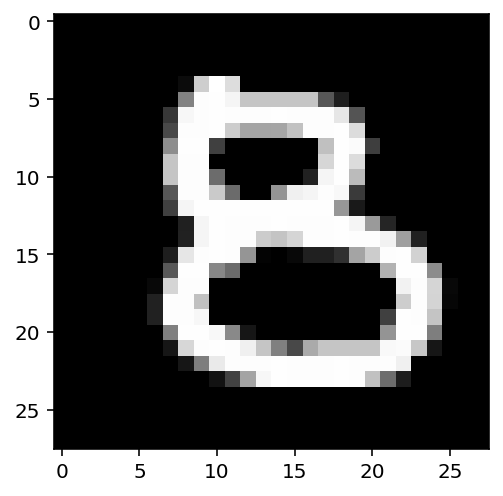

In [ ]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

## Torch NN Module

We'll see how to do it using PyTorch's nn module which provides a much more convenient and powerful method for defining network architectures.

In fully-connected networks, the input to each layer must be a one-dimensional vector (which can be stacked into a 2D tensor as a batch of multiple examples). However, our images are 28x28 2D tensors, so we need to convert them into 1D vectors. Thinking about sizes, we need to convert the batch of images with shape (64, 1, 28, 28) to a have a shape of (64, 784), 784 is 28 times 28. This is typically called flattening, we flattened the 2D images into 1D vectors.
Previously you built a network with one output unit. Here we need 10 output units, one for each digit. We want our network to predict the digit shown in an image, so what we'll do is calculate probabilities that the image is of any one digit or class. This ends up being a discrete probability distribution over the classes (digits) that tells us the most likely class for the image.

In [ ]:
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)#(64, 1, 28, 28) to (64, 784)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

In [ ]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [ ]:
print(probabilities.sum(dim=0))

tensor([4.2316e+00, 2.2374e+01, 2.3805e-04, 2.0477e-02, 1.5087e-04, 2.1441e+01,
        1.8832e-04, 1.9745e+00, 2.5309e+00, 1.1427e+01])


PyTorch provides a module nn that makes building networks much simpler. Here I'll show you how to build the same one as above with 784 inputs, 256 hidden units, 10 output units and a softmax output.

In [ ]:
from torch import nn

In [ ]:
class Network(nn.Module):
  #inheriting from nn.Module. Combined with super().__init__() this creates a class that tracks the architecture and provides a lot of useful methods and attributes.
  #It is mandatory to inherit from nn.Module when you're creating a class for your network. The name of the class itself can be anything.
    def __init__(self):
        super().__init__()

        # Inputs to hidden layer linear transformation
        # creates a module for a linear transformation, $x\mathbf{W} + b$, with 784 inputs and 256 outputs
        self.hidden = nn.Linear(784, 256)
        #You can access the weight and bias tensors once the network (net) is created with net.hidden.weight and net.hidden.bias.

        #this creates another linear transformation with 256 inputs and 10 outputs.
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)

        # Define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        #Setting dim=1 in nn.Softmax(dim=1) calculates softmax across the columns.

    #PyTorch networks created with nn.Module must have a forward method defined.
    #It takes in a tensor x and passes it through the operations you defined in the __init__ method.
    def forward(self, x):
        # Pass the input tensor through each of our operations
        #Here the input tensor x is passed through each operation a reassigned to x.
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)

        return x

In [ ]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

## torch.nn.functional module

You can define the network somewhat more concisely and clearly using the torch.nn.functional module. This is the most common way you'll see networks defined as many operations are simple element-wise functions. We normally import this module as F, import torch.nn.functional as F.


In [ ]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)

        return x

Another model

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)

        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

It's good practice to name your layers by their type of network, for instance 'fc' to represent a fully-connected layer. As you code your solution, use fc1, fc2, and fc3 as your layer names.
ReLU function is used almost exclusively as the activation function for hidden layers.
The only requirement is that for a network to approximate a non-linear function, the activation functions must be non-linear.  Here are a few more examples of common activation functions: Tanh (hyperbolic tangent), and ReLU (rectified linear unit).

initializing weights and biases: The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with model.fc1.weight for instance.



In [ ]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0053,  0.0095,  0.0104,  ..., -0.0226,  0.0165,  0.0120],
        [-0.0142, -0.0229, -0.0197,  ...,  0.0299, -0.0270, -0.0269],
        [-0.0248,  0.0253,  0.0324,  ..., -0.0175, -0.0339,  0.0020],
        ...,
        [ 0.0054,  0.0103,  0.0017,  ..., -0.0147, -0.0111, -0.0241],
        [ 0.0340, -0.0104,  0.0198,  ..., -0.0157, -0.0128, -0.0336],
        [-0.0086, -0.0058,  0.0136,  ...,  0.0086,  0.0153,  0.0127]],
       requires_grad=True)
Parameter containing:
tensor([-0.0080, -0.0018,  0.0310,  0.0209, -0.0279,  0.0038,  0.0211, -0.0280,
        -0.0354, -0.0346,  0.0077,  0.0270,  0.0150, -0.0330,  0.0125,  0.0229,
        -0.0355, -0.0016,  0.0294,  0.0053,  0.0350,  0.0210,  0.0011,  0.0176,
         0.0002, -0.0127, -0.0130, -0.0164, -0.0134, -0.0212, -0.0277,  0.0214,
         0.0184,  0.0059, -0.0313, -0.0188,  0.0225,  0.0299,  0.0299,  0.0047,
        -0.0238, -0.0196,  0.0241,  0.0200, -0.0347, -0.0111,  0.0093, -0.0025,
        -0.0106

For custom initialization, we want to modify these tensors in place. These are actually autograd Variables, so we need to get back the actual tensors with model.fc1.weight.data. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

In [ ]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-2.6965e-02,  3.2594e-03,  7.2188e-03,  ...,  2.4345e-03,
          5.3860e-04,  3.9906e-03],
        [-4.0252e-03, -9.4899e-03,  1.6548e-02,  ...,  9.1848e-03,
          8.1340e-03, -6.1363e-04],
        [ 9.9076e-04,  7.7060e-04, -9.5502e-04,  ...,  6.8196e-03,
         -5.0805e-03,  1.7135e-02],
        ...,
        [ 1.4525e-02,  1.1392e-02, -7.0820e-03,  ...,  6.6372e-03,
          8.9632e-03, -3.5935e-04],
        [-8.3963e-03, -1.1518e-02, -1.4619e-02,  ..., -1.8183e-05,
         -9.8635e-03, -2.0011e-03],
        [ 1.0964e-02, -3.1923e-03, -6.5580e-03,  ...,  6.6183e-03,
         -1.7163e-02,  1.0629e-03]])

## Test the forward pass

Now that we have a network, let's see what happens when we pass in an image.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = next(dataiter)

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [ ]:

# Grab some data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels)
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]



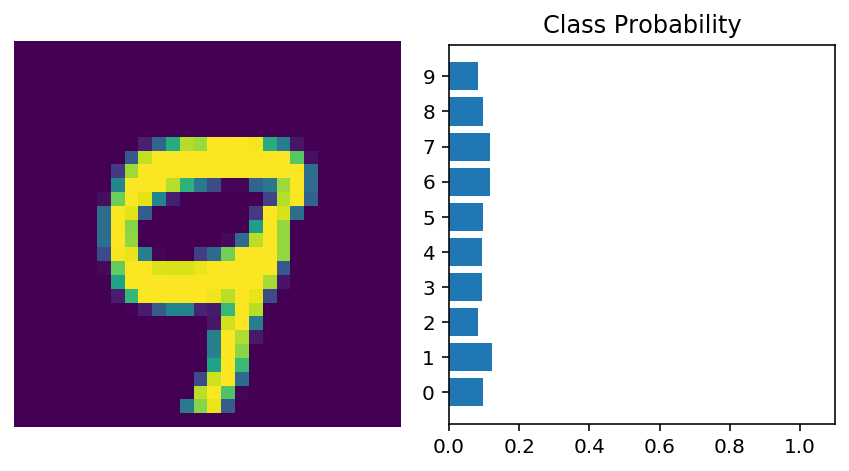

In [ ]:
view_classify(img.view(1, 28, 28), ps)

## nn.Sequential

Using nn.Sequential: PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, nn.Sequential (documentation). Using this to build the equivalent network:

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


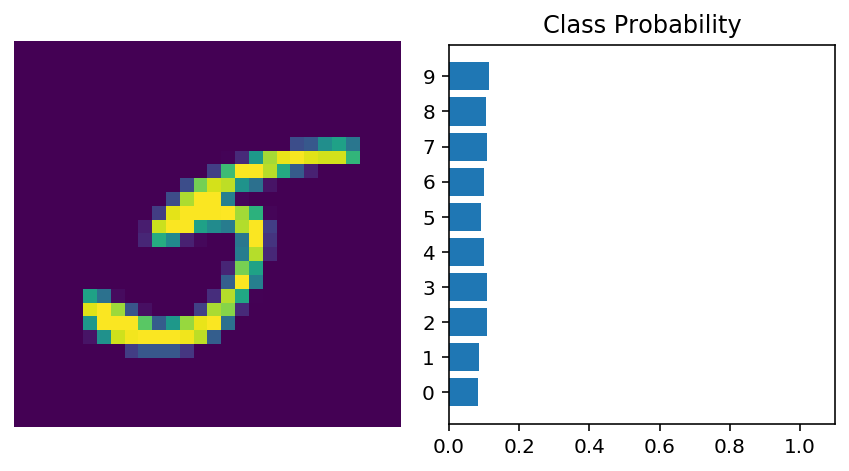

In [ ]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

The operations are availble by passing in the appropriate index. For example, if you want to get first Linear operation and look at the weights, you'd use model[0].

In [ ]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0152, -0.0294,  0.0026,  ...,  0.0148,  0.0261, -0.0223],
        [ 0.0032,  0.0163,  0.0208,  ..., -0.0124, -0.0124,  0.0186],
        [ 0.0315, -0.0142, -0.0310,  ..., -0.0192, -0.0179,  0.0007],
        ...,
        [-0.0064, -0.0138, -0.0133,  ..., -0.0205, -0.0312,  0.0161],
        [ 0.0131,  0.0127, -0.0273,  ...,  0.0140, -0.0335, -0.0295],
        [ 0.0213, -0.0146, -0.0260,  ..., -0.0235,  0.0335, -0.0196]],
       requires_grad=True)

## nn.Sequential with OrderedDict

You can also pass in an OrderedDict to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so each operation must have a different name.

In [ ]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Now you can access layers either by integer or the name

In [ ]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


## Training Neural Networks via nn.NLLLoss

Training the network!

it's more convenient to build the model with a log-softmax output using nn.LogSoftmax or F.log_softmax (documentation). Then you can get the actual probabilites by taking the exponential torch.exp(output). With a log-softmax output, you want to use the negative log likelihood loss, nn.NLLLoss (documentation).

In [ ]:
from torch import optim

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.91916799659668
Training loss: 0.8666147714230552
Training loss: 0.5323591251363123
Training loss: 0.4345304797421386
Training loss: 0.3882274371283903


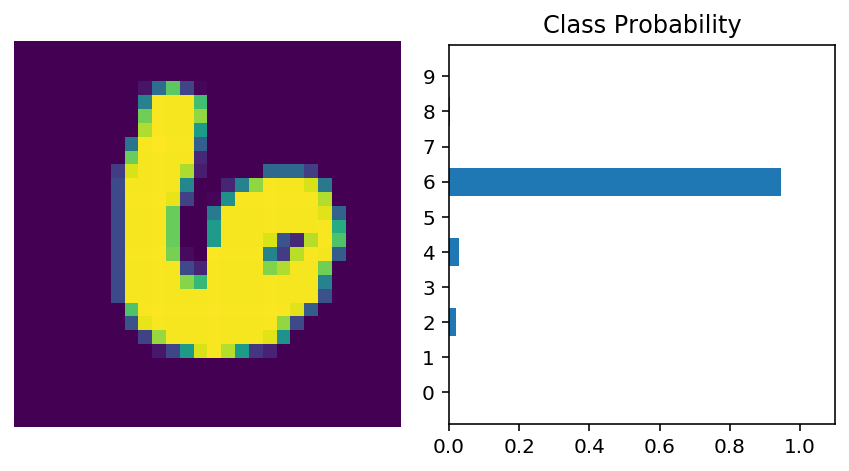

In [ ]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

## MNIST with L1 norm

In [ ]:
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms

In [ ]:
# Set fixed random number seed
torch.manual_seed(42)

# Prepare CIFAR-10 dataset
dataset = MNIST(os.getcwd(), download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

100%|██████████| 9912422/9912422 [00:00<00:00, 158307674.20it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 41399758.65it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 58524438.29it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3374761.52it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28 * 28 * 1, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

  def compute_l1_loss(self, w):
      return torch.abs(w).sum()

In [ ]:
# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
#loss_function = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3) #lr=1e-4
#optimizer = optim.SGD(model.parameters(), lr=0.003)

loss_function = nn.NLLLoss() #nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.003)

In [ ]:
# Run the training loop
for epoch in range(0, 5): # 5 epochs at maximum

  # Print epoch
  print(f'Starting epoch {epoch+1}')

  # Iterate over the DataLoader for training data
  for i, data in enumerate(trainloader, 0):

    # Get inputs
    inputs, targets = data

    # Zero the gradients
    optimizer.zero_grad()

    # Perform forward pass
    outputs = mlp(inputs)

    # Compute loss
    loss = loss_function(outputs, targets)

    # Compute L1 loss component
    l1_weight = 0.1 #1.0
    l1_parameters = []
    for parameter in mlp.parameters():
        l1_parameters.append(parameter.view(-1))
    l1 = l1_weight * mlp.compute_l1_loss(torch.cat(l1_parameters))

    # Add L1 loss component
    loss += l1

    # Perform backward pass
    loss.backward()

    # Perform optimization
    optimizer.step()

    # Print statistics
    minibatch_loss = loss.item()
    if i % 500 == 499:
        print('Loss after mini-batch %5d: %.5f (of which %.5f L1 loss)' %
              (i + 1, minibatch_loss, l1))
        current_loss = 0.0

# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch   500: 0.89534 (of which 0.91890 L1 loss)
Loss after mini-batch  1000: 0.79132 (of which 0.85138 L1 loss)
Loss after mini-batch  1500: 0.78278 (of which 0.85333 L1 loss)
Loss after mini-batch  2000: 0.76488 (of which 0.85443 L1 loss)
Loss after mini-batch  2500: 0.76180 (of which 0.85543 L1 loss)
Loss after mini-batch  3000: 0.78230 (of which 0.85660 L1 loss)
Loss after mini-batch  3500: 0.77853 (of which 0.85785 L1 loss)
Loss after mini-batch  4000: 0.75869 (of which 0.85816 L1 loss)
Loss after mini-batch  4500: 0.82480 (of which 0.85936 L1 loss)
Loss after mini-batch  5000: 0.80073 (of which 0.86069 L1 loss)
Loss after mini-batch  5500: 0.77297 (of which 0.86392 L1 loss)
Loss after mini-batch  6000: 0.76496 (of which 0.86530 L1 loss)
Starting epoch 2
Loss after mini-batch   500: 0.80290 (of which 0.86718 L1 loss)
Loss after mini-batch  1000: 0.75021 (of which 0.86947 L1 loss)
Loss after mini-batch  1500: 0.73842 (of which 0.87238 L1 loss)
Loss a

## MNIST with L2 norm

In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28 * 28 * 1, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

  def compute_l2_loss(self, w):
      return torch.square(w).sum()

In [ ]:
# Initialize the MLP
mlp2 = MLP()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [ ]:
# Run the training loop
for epoch in range(0, 5): # 5 epochs at maximum

  # Print epoch
  print(f'Starting epoch {epoch+1}')

  # Iterate over the DataLoader for training data
  for i, data in enumerate(trainloader, 0):

    # Get inputs
    inputs, targets = data

    # Zero the gradients
    optimizer.zero_grad()

    # Perform forward pass
    outputs = mlp2(inputs)

    # Compute loss
    loss = loss_function(outputs, targets)

    # Compute l2 loss component
    l2_weight = 1.0
    l2_parameters = []
    for parameter in mlp.parameters():
        l2_parameters.append(parameter.view(-1))
    l2 = l2_weight * mlp2.compute_l2_loss(torch.cat(l2_parameters))

    # Add l2 loss component
    loss += l2

    # Perform backward pass
    loss.backward()

    # Perform optimization
    optimizer.step()

    # Print statistics
    minibatch_loss = loss.item()
    if i % 500 == 499:
        print('Loss after mini-batch %5d: %.5f (of which %.5f l2 loss)' %
              (i + 1, minibatch_loss, l2))
        current_loss = 0.0

# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch   500: 2.28985 (of which 0.00000 l2 loss)
Loss after mini-batch  1000: 2.33224 (of which 0.00000 l2 loss)
Loss after mini-batch  1500: 2.29291 (of which 0.00000 l2 loss)
Loss after mini-batch  2000: 2.35104 (of which 0.00000 l2 loss)
Loss after mini-batch  2500: 2.40571 (of which 0.00000 l2 loss)
Loss after mini-batch  3000: 2.32717 (of which 0.00000 l2 loss)
Loss after mini-batch  3500: 2.34617 (of which 0.00000 l2 loss)
Loss after mini-batch  4000: 2.35007 (of which 0.00000 l2 loss)
Loss after mini-batch  4500: 2.26785 (of which 0.00000 l2 loss)
Loss after mini-batch  5000: 2.27904 (of which 0.00000 l2 loss)
Loss after mini-batch  5500: 2.28733 (of which 0.00000 l2 loss)
Loss after mini-batch  6000: 2.34296 (of which 0.00000 l2 loss)
Starting epoch 2
Loss after mini-batch   500: 2.32021 (of which 0.00000 l2 loss)
Loss after mini-batch  1000: 2.25215 (of which 0.00000 l2 loss)
Loss after mini-batch  1500: 2.26117 (of which 0.00000 l2 loss)
Loss a

## Elastic Net (L1+L2) Regularization with PyTorch

In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28 * 28 * 1, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

  def compute_l1_loss(self, w):
      return torch.abs(w).sum()

  def compute_l2_loss(self, w):
      return torch.square(w).sum()

In [ ]:
# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [ ]:
# Run the training loop
for epoch in range(0, 5): # 5 epochs at maximum

  # Print epoch
  print(f'Starting epoch {epoch+1}')

  # Iterate over the DataLoader for training data
  for i, data in enumerate(trainloader, 0):

    # Get inputs
    inputs, targets = data

    # Zero the gradients
    optimizer.zero_grad()

    # Perform forward pass
    outputs = mlp(inputs)

    # Compute loss
    loss = loss_function(outputs, targets)

    # Specify L1 and L2 weights
    l1_weight = 0.3
    l2_weight = 0.7

    # Compute L1 and L2 loss component
    parameters = []
    for parameter in mlp.parameters():
        parameters.append(parameter.view(-1))
    l1 = l1_weight * mlp.compute_l1_loss(torch.cat(parameters))
    l2 = l2_weight * mlp.compute_l2_loss(torch.cat(parameters))

    # Add L1 and L2 loss components
    loss += l1
    loss += l2

    # Perform backward pass
    loss.backward()

    # Perform optimization
    optimizer.step()

    # Print statistics
    minibatch_loss = loss.item()
    if i % 500 == 499:
        print('Loss after mini-batch %5d: %.5f (of which %.5f L1 loss; %0.5f L2 loss)' %
              (i + 1, minibatch_loss, l1, l2))
        current_loss = 0.0

# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch   500: 24.79208 (of which 19.76384 L1 loss; 2.71377 L2 loss)
Loss after mini-batch  1000: 7.45958 (of which 4.76212 L1 loss; 0.38665 L2 loss)
Loss after mini-batch  1500: 2.98764 (of which 0.65812 L1 loss; 0.02930 L2 loss)
Loss after mini-batch  2000: 2.48230 (of which 0.17971 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  2500: 2.48037 (of which 0.17778 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  3000: 2.47990 (of which 0.17730 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  3500: 2.47955 (of which 0.17696 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  4000: 2.47973 (of which 0.17713 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  4500: 2.47883 (of which 0.17624 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  5000: 2.47921 (of which 0.17663 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  5500: 2.48054 (of which 0.17796 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  6000: 2.48066 (of which 0.17808 L1 loss; 0.00001 L2 loss)
Starting 

## MNIST with NLLLoss and weight_decay

In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28 * 28 * 1, 128),
      nn.ReLU(),
      nn.Linear(128, 64),
      nn.ReLU(),
      nn.Linear(64, 10),
      nn.LogSoftmax(dim=1)
    )

  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

In [ ]:
# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.NLLLoss() #nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.003, weight_decay=0.1)
#optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4, weight_decay=1.0)


In [ ]:
# Run the training loop
for epoch in range(0, 5): # 5 epochs at maximum

  # Print epoch
  print(f'Starting epoch {epoch+1}')
  running_loss = 0

  # Iterate over the DataLoader for training data
  for i, data in enumerate(trainloader, 0):

    # Get inputs
    inputs, targets = data

    # Zero the gradients
    optimizer.zero_grad()

    # Perform forward pass
    outputs = mlp(inputs)

    # Compute loss
    loss = loss_function(outputs, targets)

    # Perform backward pass
    loss.backward()

    # Perform optimization
    optimizer.step()

    # Print statistics
    minibatch_loss = loss.item()

    running_loss += minibatch_loss
    if i % 500 == 499:
        print('Loss after mini-batch %5d: %.5f' %
              (i + 1, minibatch_loss))
        current_loss = 0.0

  print(f"Training loss: {running_loss/len(trainloader)}")

# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch   500: 2.29625
Loss after mini-batch  1000: 2.26610
Loss after mini-batch  1500: 2.25018
Loss after mini-batch  2000: 2.21213
Loss after mini-batch  2500: 2.27765
Loss after mini-batch  3000: 2.22091
Loss after mini-batch  3500: 2.10362
Loss after mini-batch  4000: 2.01979
Loss after mini-batch  4500: 1.97962
Loss after mini-batch  5000: 1.94818
Loss after mini-batch  5500: 1.72742
Loss after mini-batch  6000: 1.62884
Training loss: 2.1073102538784343
Starting epoch 2
Loss after mini-batch   500: 1.58494
Loss after mini-batch  1000: 1.54844
Loss after mini-batch  1500: 1.47698
Loss after mini-batch  2000: 1.68031
Loss after mini-batch  2500: 1.26278
Loss after mini-batch  3000: 1.69299
Loss after mini-batch  3500: 1.57599
Loss after mini-batch  4000: 1.33420
Loss after mini-batch  4500: 1.34147
Loss after mini-batch  5000: 0.88728
Loss after mini-batch  5500: 1.09051
Loss after mini-batch  6000: 1.24930
Training loss: 1.3009029420117537
Starting e

In [ ]:
images, labels = next(iter(trainloader))

img = images[4].view(1, 784)
img.shape

torch.Size([1, 784])

In [ ]:
# Turn off gradients to speed up this part
with torch.inference_mode():#torch.no_grad():
    logps = mlp(img)

In [ ]:
logps.shape

torch.Size([1, 10])

In [ ]:
logps

tensor([[-8.1563, -0.2899, -2.4180, -3.3348, -5.1323, -4.9474, -4.8144, -5.0262,
         -2.4226, -4.5796]])

In [ ]:
# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

In [ ]:
ps

tensor([[2.8694e-04, 7.4836e-01, 8.9103e-02, 3.5621e-02, 5.9032e-03, 7.1020e-03,
         8.1121e-03, 6.5634e-03, 8.8692e-02, 1.0259e-02]])

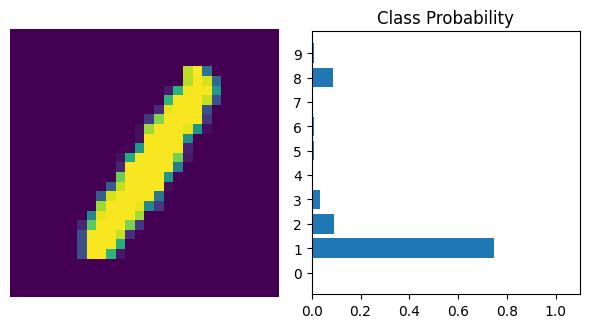

In [ ]:
view_classify(img.view(1, 28, 28), ps)

## MNIST with CrossEntropyLoss

In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28 * 28 * 1, 128),
      nn.ReLU(),
      nn.Linear(128, 64),
      nn.ReLU(),
      nn.Linear(64, 10)
    )

  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

In [ ]:
# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss() #nn.NLLLoss() #
optimizer = optim.SGD(mlp.parameters(), lr=0.003)
#optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4, weight_decay=1.0)


In [ ]:
# Run the training loop
for epoch in range(0, 5): # 5 epochs at maximum

  # Print epoch
  print(f'Starting epoch {epoch+1}')
  running_loss = 0

  # Iterate over the DataLoader for training data
  for i, data in enumerate(trainloader, 0):

    # Get inputs
    inputs, targets = data

    # Zero the gradients
    optimizer.zero_grad()

    # Perform forward pass
    outputs = mlp(inputs)

    # Compute loss
    loss = loss_function(outputs, targets)

    # Perform backward pass
    loss.backward()

    # Perform optimization
    optimizer.step()

    # Print statistics
    minibatch_loss = loss.item()

    running_loss += minibatch_loss
    if i % 500 == 499:
        print('Loss after mini-batch %5d: %.5f' %
              (i + 1, minibatch_loss))
        current_loss = 0.0

  print(f"Training loss: {running_loss/len(trainloader)}")

# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch   500: 2.25046
Loss after mini-batch  1000: 2.16376
Loss after mini-batch  1500: 1.96465
Loss after mini-batch  2000: 1.58757
Loss after mini-batch  2500: 1.53447
Loss after mini-batch  3000: 0.80353
Loss after mini-batch  3500: 0.95084
Loss after mini-batch  4000: 0.62841
Loss after mini-batch  4500: 0.75914
Loss after mini-batch  5000: 0.30831
Loss after mini-batch  5500: 0.72984
Loss after mini-batch  6000: 0.36736
Training loss: 1.1904746963642538
Starting epoch 2
Loss after mini-batch   500: 0.53681
Loss after mini-batch  1000: 1.08308
Loss after mini-batch  1500: 0.17222
Loss after mini-batch  2000: 0.32273
Loss after mini-batch  2500: 0.68576
Loss after mini-batch  3000: 0.49540
Loss after mini-batch  3500: 0.89996
Loss after mini-batch  4000: 0.72107
Loss after mini-batch  4500: 0.08715
Loss after mini-batch  5000: 1.15909
Loss after mini-batch  5500: 0.16427
Loss after mini-batch  6000: 0.25617
Training loss: 0.3868188751336808
Starting e

In [ ]:
images, labels = next(iter(trainloader))

img = images[4].view(1, 784)
img.shape

torch.Size([1, 784])

In [ ]:
# Turn off gradients to speed up this part
with torch.inference_mode():#torch.no_grad():
    logps = mlp(img)

In [ ]:
logps

tensor([[ 9.5915, -8.2068,  3.8632,  1.4661, -6.0676,  4.5186, -3.6643, -1.8895,
          3.2487, -1.4855]])

In [ ]:
ps = torch.nn.functional.softmax(logps, dim=1)
ps

tensor([[9.8853e-01, 1.8419e-08, 3.2155e-03, 2.9252e-04, 1.5644e-07, 6.1927e-03,
         1.7300e-06, 1.0206e-05, 1.7392e-03, 1.5287e-05]])

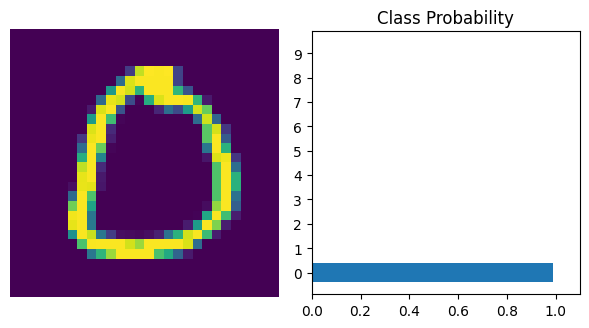

In [ ]:
view_classify(img.view(1, 28, 28), ps)

In [ ]:
logps

tensor([[-9.2253e-06, -2.2464e-06, -1.8543e-05,  4.4214e-06,  1.6578e-05,
          1.1587e-05,  1.9855e-05, -1.0638e-05, -4.3036e-06,  1.2927e-05]])